In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [5]:
city_df = pd.read_csv(city_data_to_load)

city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [11]:
city_df.info()

city_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


city            0
driver_count    0
type            0
dtype: int64

In [12]:
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [13]:
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
sum(city_df["type"]=="Urban")

66

In [15]:
sum(city_df["type"]=="Suburban")

36

In [16]:
sum(city_df["type"]=="Rural")

18

In [17]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [18]:
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [19]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [21]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [25]:
#Combine the data 
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

#display new data fram
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [28]:
# Create Urban data Frame
urban_df = pyber_df[pyber_df['type']=='Urban']
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [29]:
# Create Suburban data Frame
suburban_df = pyber_df[pyber_df['type']=='Suburban']
suburban_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [30]:
# Create Rural data Frame
rural_df = pyber_df[pyber_df['type']=='Rural']
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [32]:
#Get rider count by city for city type Urban
urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [33]:
#Get rider count by city for city type Suburban
suburban_ride_count = suburban_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [34]:
#Get rider count by city for city type Rural
rural_ride_count = rural_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [42]:
# Get avg fare for each city in city type urban
urban_avg_fare = urban_df.groupby(['city']).mean()['fare']
urban_avg_fare.head

<bound method NDFrame.head of city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64>

In [43]:
# Get avg fare for each city in city type suburban
suburban_avg_fare = suburban_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head

<bound method NDFrame.head of city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South

In [44]:
# Get avg fare for each city in city type rural
rural_avg_fare = rural_df.groupby(['city']).mean()['fare']
rural_avg_fare.head

<bound method NDFrame.head of city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64>

In [41]:
# Get avg number drivers for each city in city type urban
urban_avg_drivers = urban_df.groupby(['city']).mean()['driver_count']
urban_avg_drivers.head

<bound method NDFrame.head of city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64>

In [47]:
# Get avg number drivers for each city in city type suburban
suburban_avg_drivers = suburban_df.groupby(['city']).mean()['driver_count']
suburban_avg_drivers.head

<bound method NDFrame.head of city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville     

In [46]:
# Get avg number drivers for each city in city type =rural
rural_avg_drivers = rural_df.groupby(['city']).mean()['driver_count']
rural_avg_fare.head

<bound method NDFrame.head of city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64>

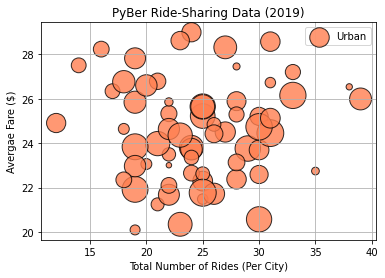

In [58]:
#build scatter plot for Urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_avg_drivers, 
            c="coral", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avergae Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()
plt.show()

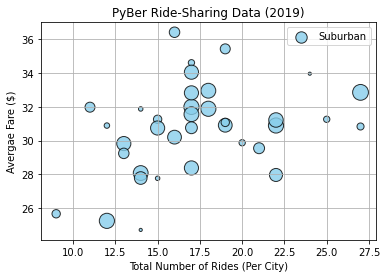

In [59]:
#build scatter plot for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_avg_drivers, 
            c="skyblue", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Suburban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avergae Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()
plt.show()

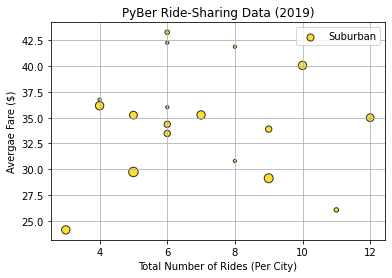

In [60]:
#build scatter plot for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_avg_drivers, 
            c="gold", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avergae Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()
plt.show()

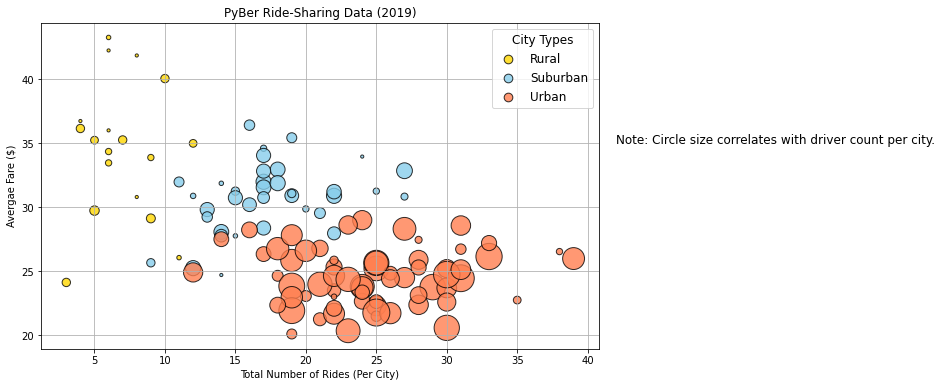

<Figure size 432x288 with 0 Axes>

In [71]:
#Combine the 3 scatter plots for each type of city
plt.subplots(figsize=(10, 6))
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_avg_drivers, 
            c="gold", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Rural")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_avg_drivers, 
            c="skyblue", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Suburban")

#build scatter plot for Urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_avg_drivers, 
            c="coral", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Urban")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avergae Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)

# Crete a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.show()

# Save the figure.
plt.savefig("Analysis/Fig1.png")

